# Constraint Consistency from Luminosity Function Fitting

In [1]:
import corner
import h5py
import numpy as np
from IPython.display import display, Math
from matplotlib import pyplot as plt

from conf import PATHOUT
from application.plot_constraints import gradient_colour_map, plot_2d_constraints

Load relativistic bias parameter chains from sampled luminosity function.

In [2]:
this_work = "relbias_z2._eBOSS_QSO_LF_PLE_zeus_poisson_1596047_20_2E5_by1.h5"
shifted_samples = "relbias_z2._eBOSS_QSO_LF_PLE_zeus_poisson_shifted_1596047_20_2E5_by1.h5"

In [3]:
with h5py.File(PATHOUT/"publication"/"shifted"/this_work, 'r') as chain_file:
    this_work_chain = chain_file['extract/chain'][()]
with h5py.File(PATHOUT/"publication"/"shifted"/shifted_samples, 'r') as chain_file:
    shifted_chain = chain_file['extract/chain'][()]

Plot constraints.

In [4]:
estimate_str = lambda source, x_estimate, y_estimate: \
    r"\text{{{}: }} f_\mathrm{{e}} = {:.3f}_{{-{:.3f}}}^{{+{:.3f}}}, s = {:.3f}_{{-{:.3f}}}^{{+{:.3f}}}".format(
        source.capitalize(),
        x_estimate[0], x_estimate[0] - x_estimate[1], x_estimate[-1] - x_estimate[0],
        y_estimate[0], y_estimate[0] - y_estimate[1], y_estimate[-1] - y_estimate[0],
    )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

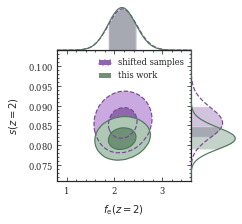

In [5]:
fig, x_estimate, y_estimate, *_ = plot_2d_constraints(
    shifted_chain, bins=200, smooth=0.8, cmap=gradient_colour_map('#E7CDFA', '#774999', 'PortsmouthPurple'),
    linestyle='dashed', precision_x=3, precision_y=3, show_estimates=False,
    label='shifted samples', label_x='f_\mathrm{e}', label_y='s', figsize=(3.2, 3.2)
)
display(Math(estimate_str('this work', x_estimate, y_estimate)))

fig, x_estimate, y_estimate, *_ = plot_2d_constraints(
    this_work_chain, bins=200, smooth=0.8, cmap=gradient_colour_map('#D2E6D6', '#51785D', 'CambridgeBlue'),
    precision_x=3, precision_y=3, show_estimates=False, 
    label='this work', label_x='f_\mathrm{e}(z=2)', label_y='s(z=2)',
    fig=fig
)
display(Math(estimate_str('shifted samples', x_estimate, y_estimate)))

canvas, top_panel, side_panel = fig.axes
canvas.set_xlim(0.8, 3.6)
canvas.set_ylim(0.0710, 0.104)
side_panel.set_xlim(right=145.)

fig.savefig(PATHOUT/"publication"/"gallery"/"constraint_consistency.pdf")